In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np


In [3]:
# Import data csv files
#check if it transfered correctly
mouse_metadata = "Mouse_metadata.csv"
mouse_metadata_df=pd.read_csv(mouse_metadata)
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results = "Study_results.csv"
study_results_df=pd.read_csv(study_results)
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#Merge datasets - inner merging
complete_df = pd.merge(mouse_metadata_df,study_results_df,on="Mouse ID", how="inner")
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#Checking total mouse id ( to check for duplication of data) - Step1
complete_df['Mouse ID'].count()


1893

In [7]:
#Checking total mouse id ( to check for duplication of data)-Step2
len(complete_df['Mouse ID'].unique())

249

In [8]:
#Copy the complete dataframe for getting it ready for clean up
mouse_complete_df=complete_df.copy()
mouse_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#Make dataframe of duplicate data
duplicate_df=mouse_complete_df.loc[mouse_complete_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
#Make new dataframe without duplicated data of Mouse IDg989
mouse_final_df=mouse_complete_df[mouse_complete_df["Mouse ID"].str.contains("g989")==False]
mouse_final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
#Check the data after dropping duplicated data. Earlier it was 249, so after dropping g989 it should be 248
len(mouse_final_df['Mouse ID'].unique())

248

In [12]:
#calculating statistics summary
mouse_summary_df=mouse_final_df.groupby("Drug Regimen")['Tumor Volume (mm3)'] .aggregate(['mean','median','var','std','sem'])
mouse_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Renaming summary columns
mouse_summary_df=mouse_summary_df.rename(columns={ 'mean':'Mean Tumor Volume','median':'Median Tumor Volume','var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.','sem':'Tumor Volume Std. Err.'})
mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
mouse_summary_df['Mean Tumor Volume']=mouse_summary_df['Mean Tumor Volume'].round(2)
mouse_summary_df["Median Tumor Volume"]=mouse_summary_df['Median Tumor Volume'].round(2)
mouse_summary_df["Tumor Volume Variance"]=mouse_summary_df['Tumor Volume Variance'].round(2)
mouse_summary_df["Tumor Volume Std. Dev."]=mouse_summary_df['Tumor Volume Std. Dev.'].round(2)
mouse_summary_df["Tumor Volume Std. Err."]=mouse_summary_df["Tumor Volume Std. Err."].round(2)
mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


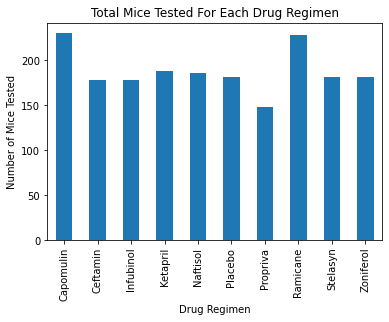

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_groups = mouse_final_df.groupby("Drug Regimen")
total_mice_tested=drug_groups.count()["Timepoint"]
drug_chart = total_mice_tested.plot(kind="bar")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mice Tested")
plt.title("Total Mice Tested For Each Drug Regimen")
plt.show()
plt.tight_layout() 


In [16]:
drug_counts=mouse_final_df['Drug Regimen'].value_counts()
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

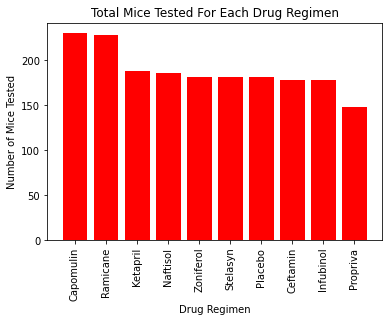

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_counts=mouse_final_df['Drug Regimen'].value_counts()
drugchart = plt.bar(drug_counts.index.values, drug_counts.values, color="r", align="center")
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title("Total Mice Tested For Each Drug Regimen")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

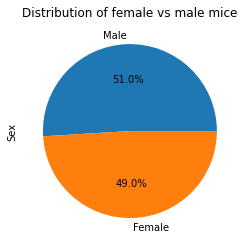

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_groups = mouse_final_df.Sex.value_counts()
Pie_figure1=gender_groups.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of female vs male mice")
plt.show

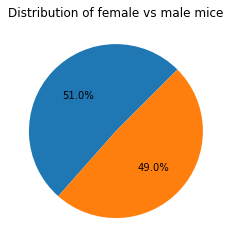

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Matplotlib pyplot method
plt.pie(gender_groups,autopct="%1.1f%%",startangle=45)
plt.title("Distribution of female vs male mice")
plt.show()

In [20]:
#Select dataframe containing four drug regimen, then pick greatest ime point for each mouse
#selected_mouse_df=[mouse_final_df['Drug Regimen']=='Capomulin','Ramicane','Infubinol','Ceftamin']
max_data=mouse_final_df.groupby("Mouse ID").max()['Timepoint']
max_data
#mouse_final_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [21]:
max_df=pd.merge(max_data,mouse_final_df,on=['Mouse ID','Timepoint'],how='left')
max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [22]:
#Convert four Drug regimen  list
list_of_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
list_of_treatments


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [23]:
# Create empty list to fill with tumor vol data 
tumor_vol_list = []
tumor_vol_list  
   

[]

In [24]:
#Fill tumor vol data in empty list
for i in list_of_treatments:
        selected_drugs_vol=max_df.loc[max_df['Drug Regimen']==i]['Tumor Volume (mm3)']
        tumor_vol_list.append(selected_drugs_vol)

In [25]:
tumor_vol_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

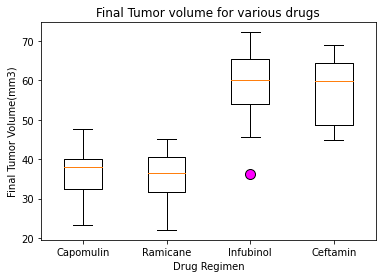

In [26]:
#Create boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor volume for various drugs')
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_list,labels=list_of_treatments,flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
plt.show()




In [27]:
#Determine outliers for drug regimens 
for i in list_of_treatments:
    selected_drugs_vol=max_df.loc[max_df['Drug Regimen']==i]['Tumor Volume (mm3)']
    tumor_vol_list.append(selected_drugs_vol)
    quartiles=selected_drugs_vol.quantile([.25,.5,.75])
    q1= quartiles[0.25]
    q3 = quartiles[0.75]
    median= quartiles[0.5]
    iqr= q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers = selected_drugs_vol[(selected_drugs_vol<lower_bound) | (selected_drugs_vol>upper_bound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [28]:
#Creater dataframe with data of Drug Capomulin
cap_drug_df = mouse_final_df.loc[mouse_final_df["Drug Regimen"] == 'Capomulin']
#Select data for one mouse s185
s185_df=cap_drug_df.loc[cap_drug_df["Mouse ID"] == 's185']
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


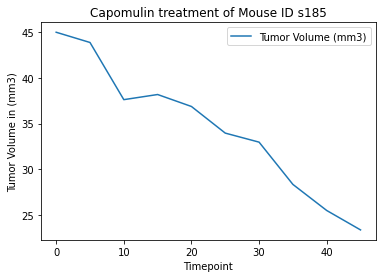

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a line plot of tumor volume vs. time point for mouse s185 treated with Capomulin
s185_chart=s185_df.plot('Timepoint', 'Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse ID s185')
plt.ylabel('Tumor Volume in (mm3)')
plt.show()
plt.tight_layout() 

In [30]:
cap_drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [31]:
# Make dataframe for scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = cap_drug_df.groupby("Mouse ID")
scatter_df= scatter_df['Weight (g)','Tumor Volume (mm3)'].mean()
scatter_df


C:\Users\anjul\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


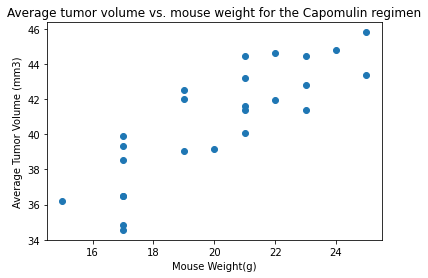

In [32]:
# Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)']) 
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average tumor volume vs. mouse weight for the Capomulin regimen')
plt.show()


In [33]:
#Calculate correlation coefficient
correlation=st.pearsonr(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)']) 
print(f"The correlation coefficient between Mouse Weight(g) and Average Tumor Volume (mm3) is {round(correlation[0],2)}")



The correlation coefficient between Mouse Weight(g) and Average Tumor Volume (mm3) is 0.84


In [34]:
#Dependency for regression
from scipy.stats import linregress


The r-squared is: 0.709


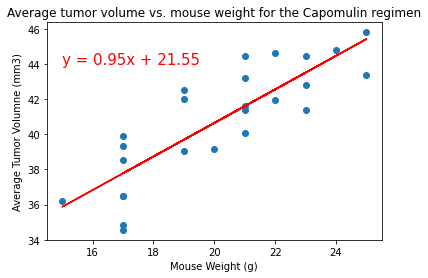

In [35]:
x_values = scatter_df['Weight (g)']
y_values = scatter_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
plt.scatter(x_values,y_values) 
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(15,44),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volumne (mm3)')
plt.title('Average tumor volume vs. mouse weight for the Capomulin regimen')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

